# Hypotheses

- Zip Codes with higher Asian population will have more reviews (a Yelp claim)


In [108]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from census import Census
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
# import yelp+census data
yelp_census_df = pd.read_csv('yelp_census_data.csv')
yelp_census_df.head()
#len(yelp_census_df)

,Unnamed: 0,Median Age,Population,White,Black,Asian,Hispanic,Poverty Count,Household Income,Per Capita Income,Zip Code,Review Count,Price,Average Rating
0,0,28.0,57942,20811,5153,97,52223,18902,34323,11294,90001,3056,NaN,3.917866
1,1,27.5,51826,19573,11188,311,39527,18302,32520,11212,90002,4943,NaN,4.124924
2,2,28.0,70208,18114,16206,180,53630,24556,31878,10611,90003,6564,NaN,4.249543
3,3,35.5,63095,25611,2405,15870,31965,12919,43180,29194,90004,12633,NaN,4.260548
4,4,33.9,39338,7471,2213,13289,20199,11520,31485,20265,90005,13671,NaN,4.324738


In [69]:
# drop extraneous column
yc_df1 = yelp_census_df.drop(columns='Unnamed: 0', axis=1)

yc_df1.head()


,Median Age,Population,White,Black,Asian,Hispanic,Poverty Count,Household Income,Per Capita Income,Zip Code,Review Count,Price,Average Rating
0,28.0,57942,20811,5153,97,52223,18902,34323,11294,90001,3056,NaN,3.917866
1,27.5,51826,19573,11188,311,39527,18302,32520,11212,90002,4943,NaN,4.124924
2,28.0,70208,18114,16206,180,53630,24556,31878,10611,90003,6564,NaN,4.249543
3,35.5,63095,25611,2405,15870,31965,12919,43180,29194,90004,12633,NaN,4.260548
4,33.9,39338,7471,2213,13289,20199,11520,31485,20265,90005,13671,NaN,4.324738


In [72]:
# #set index to zip code (our data is on zip code level)
yc_df1 = yc_df1.set_index('Zip Code')

yc_df1.head()

,Median Age,Population,White,Black,Asian,Hispanic,Poverty Count,Household Income,Per Capita Income,Review Count,Price,Average Rating
Zip Code,,,,,,,,,,,,
90001,28.0,57942,20811,5153,97,52223,18902,34323,11294,3056,NaN,3.917866
90002,27.5,51826,19573,11188,311,39527,18302,32520,11212,4943,NaN,4.124924
90003,28.0,70208,18114,16206,180,53630,24556,31878,10611,6564,NaN,4.249543
90004,35.5,63095,25611,2405,15870,31965,12919,43180,29194,12633,NaN,4.260548
90005,33.9,39338,7471,2213,13289,20199,11520,31485,20265,13671,NaN,4.324738


In [84]:
# percent ethnicity type per population

perc_white = round(yc_df1["White"]/yc_df1["Population"]*100,1)
perc_black = round(yc_df1["Black"]/yc_df1["Population"]*100,1)
perc_asian = round(yc_df1["Asian"]/yc_df1["Population"]*100,1)
perc_hisp = round(yc_df1["Hispanic"]/yc_df1["Population"]*100,1)

#percent poverty per zip

perc_poverty = round(yc_df1["Poverty Count"]/yc_df1["Population"]*100,1)


1623

In [101]:
#Create updated dataframe
yc_complete_df = pd.DataFrame({#"Zip Code": yc_df1["Zip Code"],
                            "Median Age": yc_df1["Median Age"],
                            "White": yc_df1["White"],
                            "Black": yc_df1["Black"],
                            "Asian": yc_df1["Asian"],
                            "Hispanic": yc_df1["Hispanic"],
                            "% White": perc_white,
                            "% Black": perc_black,
                            "% Asian": perc_asian,
                            "% Hispanic": perc_hisp,
                            "Poverty Count": yc_df1["Poverty Count"],
                            "% Poverty": perc_poverty,
                            "Population": yc_df1["Population"],
                            "Household Income": yc_df1["Household Income"],
                            "Per Capita Income":  yc_df1["Per Capita Income"],
                            "Review Count": yc_df1["Review Count"],
                            "Average Rating": yc_df1["Average Rating"]
                              })

yc_complete_df.head()


,% Asian,% Black,% Hispanic,% Poverty,% White,Asian,Average Rating,Black,Hispanic,Household Income,Median Age,Per Capita Income,Population,Poverty Count,Review Count,White
Zip Code,,,,,,,,,,,,,,,,
90001,0.2,8.9,90.1,32.6,35.9,97,3.917866,5153,52223,34323,28.0,11294,57942,18902,3056,20811
90002,0.6,21.6,76.3,35.3,37.8,311,4.124924,11188,39527,32520,27.5,11212,51826,18302,4943,19573
90003,0.3,23.1,76.4,35.0,25.8,180,4.249543,16206,53630,31878,28.0,10611,70208,24556,6564,18114
90004,25.2,3.8,50.7,20.5,40.6,15870,4.260548,2405,31965,43180,35.5,29194,63095,12919,12633,25611
90005,33.8,5.6,51.3,29.3,19.0,13289,4.324738,2213,20199,31485,33.9,20265,39338,11520,13671,7471


In [103]:
#sort dataframe by ethnicity
yc_test = yc_complete_df.sort_values(by='Review Count', ascending=False)
yc_test.head(20)

,% Asian,% Black,% Hispanic,% Poverty,% White,Asian,Average Rating,Black,Hispanic,Household Income,Median Age,Per Capita Income,Population,Poverty Count,Review Count,White
Zip Code,,,,,,,,,,,,,,,,
92110,7.2,3.4,20.2,12.9,81.9,2051,4.251587,983,5749,61310,32.8,32007,28508,3664,33720,23348
90013,16.6,30.2,15.2,44.8,37.3,1935,4.152921,3522,1777,22058,43.7,33518,11668,5229,33174,4349
90012,41.0,12.5,28.3,23.8,29.0,13329,4.145630,4074,9195,32712,35.8,21989,32543,7755,32356,9438
92106,6.0,3.7,15.5,6.4,83.4,1129,4.294748,693,2917,83288,37.3,50098,18864,1211,28940,15732
92103,6.5,4.2,17.1,9.5,82.1,2210,4.130691,1437,5790,72200,39.3,53613,33873,3213,28732,27823
92101,8.3,8.4,20.1,20.5,76.3,3054,4.125818,3092,7390,57209,37.9,53630,36857,7574,28255,28139
92802,14.3,1.7,61.5,19.4,73.8,6080,4.025326,718,26201,51913,33.4,20032,42583,8269,25132,31415
90401,9.7,7.2,15.7,11.9,75.7,741,4.117892,548,1197,67022,38.2,64866,7621,907,24497,5768
94109,26.1,4.1,10.5,13.3,60.7,14644,4.147517,2305,5873,71043,36.1,69520,56019,7465,24160,33999


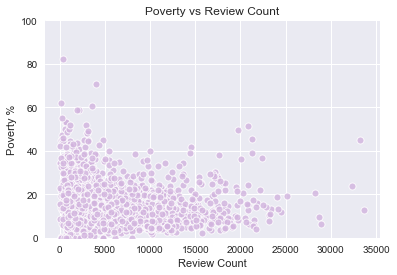

In [128]:
# Plot of poverty vs review count
plt.scatter(yc_complete_df["Review Count"], 
            yc_complete_df["% Poverty"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="#D2B4DE", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("Poverty vs Review Count")
plt.ylabel("Poverty %")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()

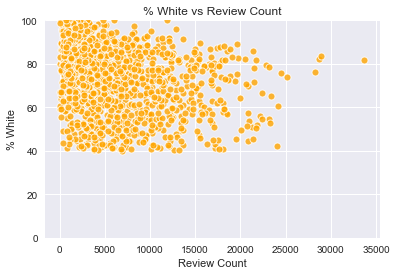

In [143]:
#Plot majority White Zip Codes
maj_white = yc_complete_df[yc_complete_df["% White"] > 40]

# Plot of Asian vs Review Count
plt.scatter(maj_white["Review Count"], 
            maj_white["% White"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="orange", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("% White vs Review Count")
plt.ylabel("% White")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()

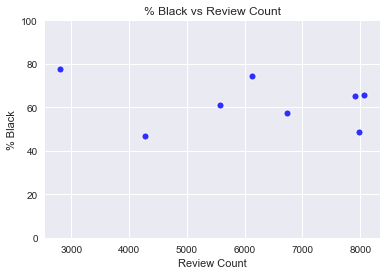

In [145]:
#Plot majority Black Zip Codes
maj_black = yc_complete_df[yc_complete_df["% Black"] > 40]

# Plot of Asian vs Review Count
plt.scatter(maj_black["Review Count"], 
            maj_black["% Black"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="blue", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("% Black vs Review Count")
plt.ylabel("% Black")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()

In [168]:
#Plot majority Asian Zip Codes
maj_asian = yc_complete_df[yc_complete_df["% Asian"] > 50]
maj_asian.head()
#len(maj_asian)

,% Asian,% Black,% Hispanic,% Poverty,% White,Asian,Average Rating,Black,Hispanic,Household Income,Median Age,Per Capita Income,Population,Poverty Count,Review Count,White
Zip Code,,,,,,,,,,,,,,,,
90010,69.1,5.6,10.6,16.5,18.9,2436,4.340236,199,373,47569,38.8,37831,3524,581,11251,665
90703,60.0,8.2,13.6,5.6,23.5,30264,4.272956,4156,6849,94752,44.5,36066,50442,2811,11903,11870
91006,55.9,1.0,15.5,9.1,31.9,17963,4.031686,333,4978,90829,43.5,41374,32106,2923,5665,10249
91007,60.6,2.2,10.9,10.1,28.5,20977,4.014508,770,3771,75353,45.0,35923,34619,3486,7272,9877
91108,53.5,1.2,8.7,7.5,38.9,7317,4.208602,167,1193,141739,46.8,74523,13675,1028,12881,5318


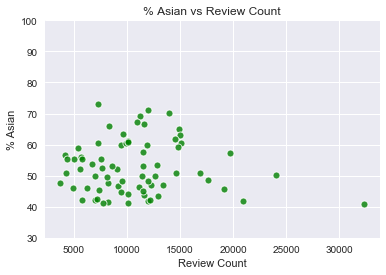

In [158]:
#Plot majority Asian Zip Codes
maj_asian = yc_complete_df[yc_complete_df["% Asian"] > 40]

# Plot of Asian vs Review Count
plt.scatter(maj_asian["Review Count"], 
            maj_asian["% Asian"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="green", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("% Asian vs Review Count")
plt.ylabel("% Asian")
plt.xlabel("Review Count")
plt.ylim((30,100))
plt.grid(True)
sns.set()

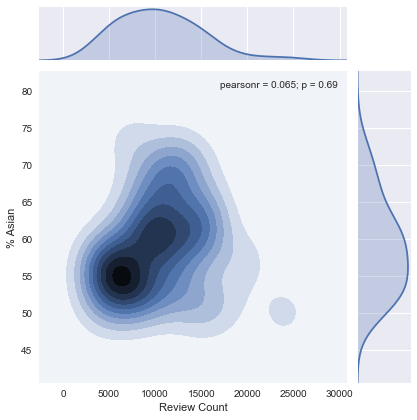

In [172]:
# Density Estimation Plot of % Asian vs Review Count
hexplot = sns.jointplot(x=maj_asian["Review Count"], y=maj_asian["% Asian"], data=maj_asian, kind="kde");

plt.show()

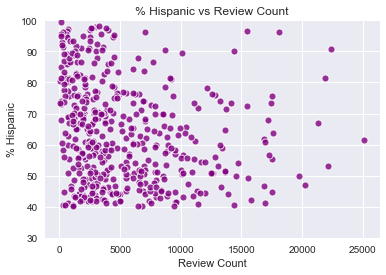

In [157]:
#Plot majority Hispanic Zip Codes
maj_hisp = yc_complete_df[yc_complete_df["% Hispanic"] > 40]

# Plot of Asian vs Review Count
plt.scatter(maj_hisp["Review Count"], 
            maj_hisp["% Hispanic"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="purple", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("% Hispanic vs Review Count")
plt.ylabel("% Hispanic")
plt.xlabel("Review Count")
plt.ylim((30,100))
plt.grid(True)
sns.set()

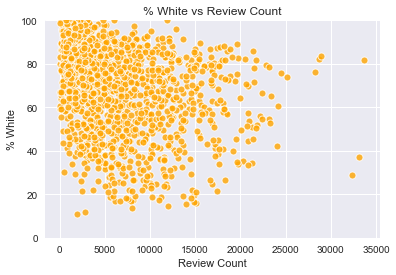

In [170]:
# Plot of White vs Average Rating
plt.scatter(yc_complete_df["Review Count"], 
            yc_complete_df["% White"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="orange", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("% White vs Review Count")
plt.ylabel("% White")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()

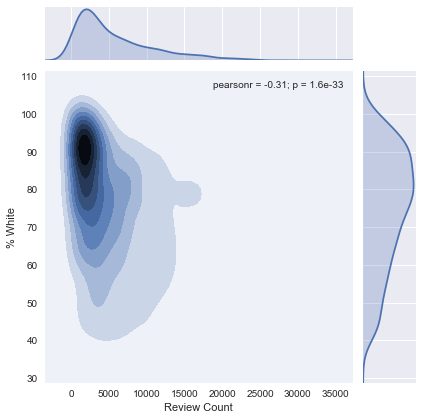

In [174]:
#Plot majority White Zip Codes
maj_white = yc_complete_df[yc_complete_df["% White"] > 40]

# Density Estimation Plot of % Asian vs Review Count
hexplot = sns.jointplot(x=maj_white["Review Count"], y=maj_white["% White"], data=maj_white, kind="kde");

plt.show()

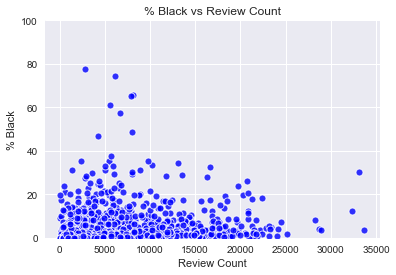

In [169]:
# Plot of  vs Average Rating
plt.scatter(yc_complete_df["Review Count"], 
            yc_complete_df["% Black"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="blue", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Review Count")

# Incorporate the other graph properties
plt.title("% Black vs Review Count")
plt.ylabel("% Black")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()

In [178]:
#Plot majority White Zip Codes
maj_black = yc_complete_df[yc_complete_df["% Black"] > 40]
len(maj_black) # only 8 zip codes in CA...throwing out

# Density Estimation Plot of % Asian vs Review Count
hexplot = sns.jointplot(x=maj_black["Review Count"], y=maj_black["% Black"], data=maj_black, kind="kde");

plt.show()

8

In [150]:
yc_fin_top200 = yc_complete_df.nlargest(200, "Population")
yc_fin_top200rev = yc_complete_df.nlargest(200, "Review Count")
yc_fin_top200rev.head()
#len(yc_fin_top200rev)

,% Asian,% Black,% Hispanic,% Poverty,% White,Asian,Average Rating,Black,Hispanic,Household Income,Median Age,Per Capita Income,Population,Poverty Count,Review Count,White
Zip Code,,,,,,,,,,,,,,,,
92110,7.2,3.4,20.2,12.9,81.9,2051,4.251587,983,5749,61310,32.8,32007,28508,3664,33720,23348
90013,16.6,30.2,15.2,44.8,37.3,1935,4.152921,3522,1777,22058,43.7,33518,11668,5229,33174,4349
90012,41.0,12.5,28.3,23.8,29.0,13329,4.145630,4074,9195,32712,35.8,21989,32543,7755,32356,9438
92106,6.0,3.7,15.5,6.4,83.4,1129,4.294748,693,2917,83288,37.3,50098,18864,1211,28940,15732
92103,6.5,4.2,17.1,9.5,82.1,2210,4.130691,1437,5790,72200,39.3,53613,33873,3213,28732,27823


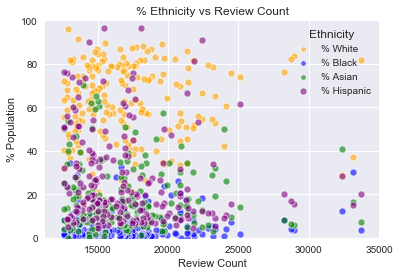

In [161]:
# Plot of % ethnicity vs review count
plt.scatter(yc_fin_top200rev["Review Count"], 
            yc_fin_top200rev["% White"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="orange", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% White")

plt.scatter(yc_fin_top200rev["Review Count"], 
            yc_fin_top200rev["% Black"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="blue", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% Black")

plt.scatter(yc_fin_top200rev["Review Count"], 
            yc_fin_top200rev["% Asian"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="green", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% Asian")

plt.scatter(yc_fin_top200rev["Review Count"], 
            yc_fin_top200rev["% Hispanic"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="purple", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% Hispanic")

# Incorporate the other graph properties
plt.title("% Ethnicity vs Review Count")
plt.ylabel("% Population")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()


# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="Ethnicity", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

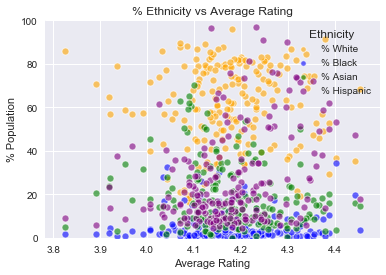

In [163]:
# Plot of average rating vs review count
plt.scatter(yc_fin_top200rev["Average Rating"], 
            yc_fin_top200rev["% White"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="orange", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% White")

plt.scatter(yc_fin_top200rev["Average Rating"], 
            yc_fin_top200rev["% Black"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="blue", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% Black")

plt.scatter(yc_fin_top200rev["Average Rating"], 
            yc_fin_top200rev["% Asian"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="green", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% Asian")

plt.scatter(yc_fin_top200rev["Average Rating"], 
            yc_fin_top200rev["% Hispanic"], 
            #s=yc_fin_df["Average Delta"]*10, 
            c="purple", edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="% Hispanic")

# Incorporate the other graph properties
plt.title("% Ethnicity vs Average Rating")
plt.ylabel("% Population")
plt.xlabel("Average Rating")
plt.ylim((0,100))
plt.grid(True)
sns.set()


# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="Ethnicity", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]